In [1]:
"""
@author: Elif Koksal Ersoz

This file is for running simulations in simu_E_g.py file for a given combination.  
    """
import numpy as np
import time
from matplotlib import pyplot as plt

import parameterLists
import simu_E_g
import fromlist_loop
import activitity_analysis_test

colorList = ['blue','red', 'orange','purple','g','cyan','firebrick','magenta','brown', 'black']


Combination :  [0.04, 300, 0.004, 0.6, 0.4]
Simulation number:  0
Simulation number:  1
Simulation number:  2
Simulation number:  3
Simulation number:  4
Completed in 2.7763681411743164 sec


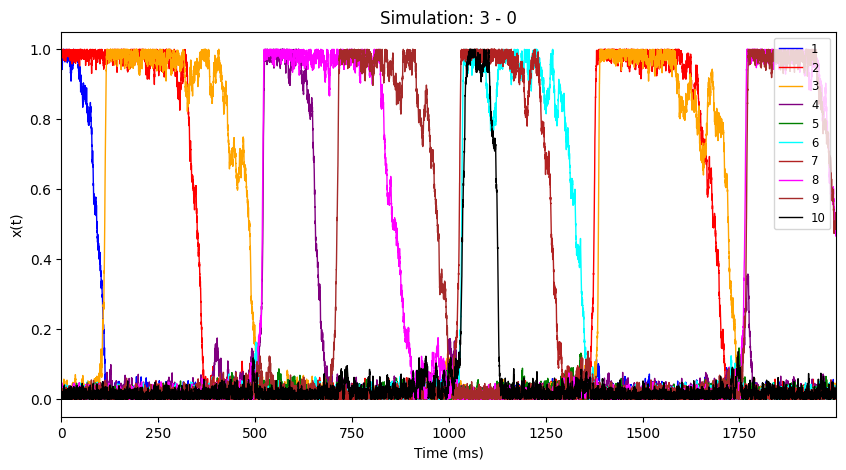

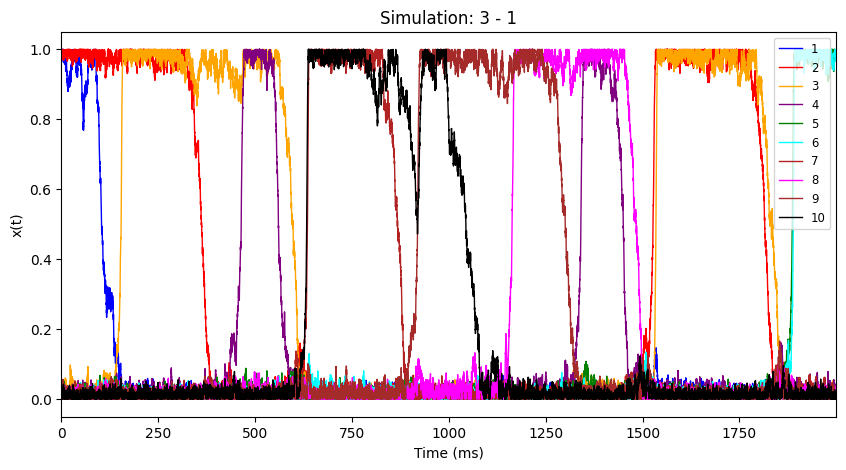

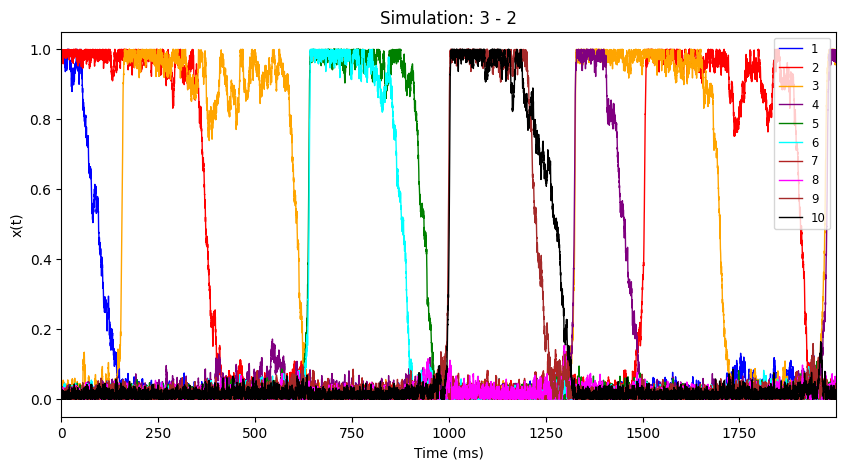

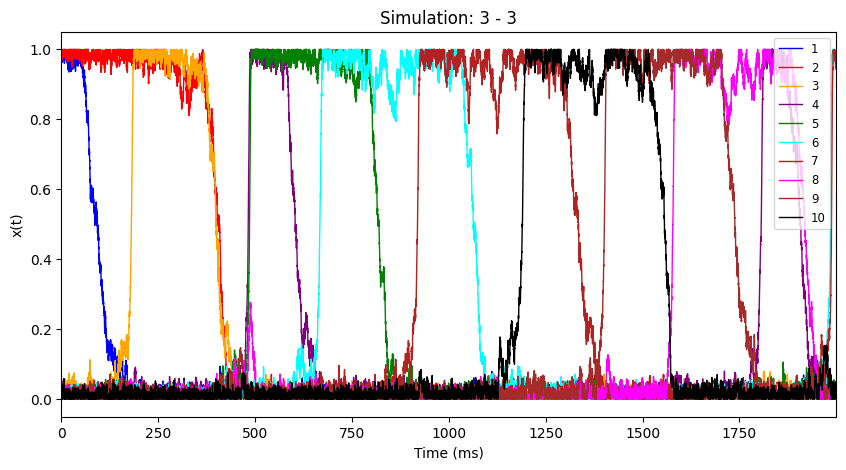

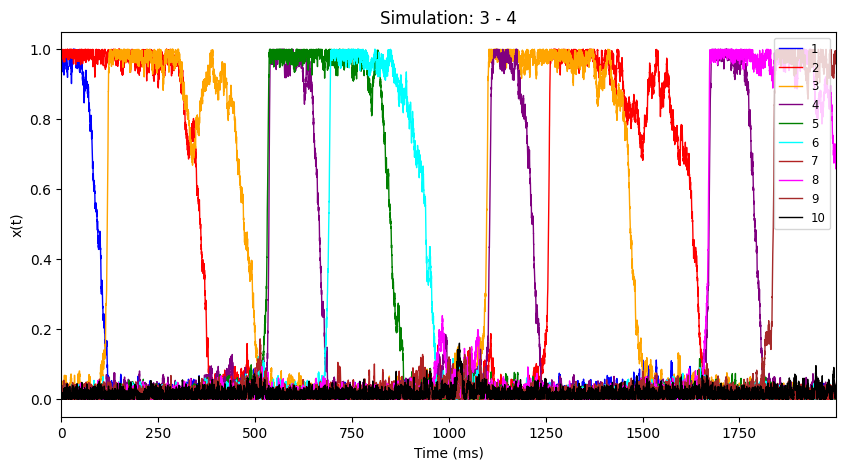

In [15]:
p = parameterLists.parameters_cycling()  # create an instance of the parameters class
eta = p.liste_eta[0]
rho = p.liste_rho[0]
tau = p.liste_tau[0]          
G = p.liste_G[0]
mu_global = p.liste_mu[0]
mu = np.ones(p.N) * mu_global
if p.branch_type == 2 or p.branch_type == 3:  # branching
    mu[1 + p.branch_unit[0]:] = p.liste_mu_change[0]  # change mu for the branch unit
u = rho/tau
print('Combination : ',[eta, tau, u, G, mu[0]])
time_start1 = time.time()         
last_unit_index = np.zeros(int(p.simulationspercombination))
next_unit_index = np.zeros(int(p.simulationspercombination))                                        
for n in range(0, int(p.simulationspercombination)):    
    print("Simulation number: ", n)
    # Run the simulation
    ts, xComplete = simu_E_g.simulation(p, eta, tau, u, mu, G)
    # Save the activity pattern
    simu_E_g.save_activity_pattern(ts, xComplete, p, eta, tau, u, mu, G, n)
    # # Plot the activity pattern
    figure = plt.figure(figsize=(10, 5))
    for i in range(p.N):
        plt.title('Simulation: {} - {}'.format(p.branch_type, n))
        plt.plot(ts, xComplete[:,i], linewidth=1.0, color = colorList[i], label="{}".format(i+1))
        plt.xlim(0, ts[-1])
        plt.xlabel('Time (ms)')
        plt.ylabel('x(t)')
        plt.legend(loc = 'upper right', fontsize='small')

time_end1 = time.time()
print("Completed in {} sec".format(time_end1 - time_start1))  

# Analyze the activity pattern
pattern_initial, pattern_next, branch_initial, branch_next = activitity_analysis_test.execute(p, eta, tau, u, mu, G)
# Plot the activity pattern

In [16]:
pattern_initial

[['B', 'C', 'B', 'B', 'B']]

In [17]:
branch_initial

array([[0., 0., 0., 0., 0.]])

In [18]:
pattern_next

[['G', 'J', 'E', 'D', 'D']]

In [19]:
branch_next 

array([[4., 5., 1., 1., 1.]])